# Introduction

Customer churn analytics are critical in the any competitive industry. When customers abandon a service for a competitor, companies not only lose revenue but also must spend more on acquiring new customers. As a result, companies leverage customer data analytics to understand what drives churn and boost customer loyalty.
The Telco Customer Churn project utilizes data on over 7,000 customer profiles. By scrutinizing this data, telecom companies can uncover churn drivers, tailor retention strategies, and optimize customer interactions.

This project has four key phases:

1.	Explain the dataset and analytical methods used to extract insights.
2.	Identify trends and correlations in the data revealing customer behaviors and what impacts churn.
3.	Develop a predictive model to forecast churn, enabling proactive outreach to retain customers.
4.	Synthesize findings to conclude what mainly causes churn and propose data-driven recommendations to mitigate it.

In essence, customer analytics, also known as customer data analytics, is the systematic examination of a company's customer information and behavior to identify, attract, and retain the most profitable customers. It involves the process of collecting and analyzing customer data to gain insights on customer behavior, which can be used to make informed business decisions related to marketing, product development, sales, and more. 


# Dataset description

The Telco customer churn dataset contains information on 7,048 customers, including a churn label indicating whether a customer ended service. The 20 features provide insights into customer demographics, account details (services and add-ons), and billing information. Below is a description of the features in the Telco customer churn dataset, grouping them into the following categories:

**Demographics** 
- Gender: Male or Female customers
- SeniorCitizen: Boolean indicating if aged 65+ 
- Dependents: If customer has other dependents on account
- Partner: If customer has partner

**Account details**
- Tenuer: length of time (months) customer has been with the company
- PhoneService: Has phone service 
- MultipleLines: Multiple phone lines
- InternetService: Type of internet service (DSL, Fiber optic, No internet)
- OnlineSecurity: Online security add-on  
- OnlineBackup: Online backup service add-on
- DeviceProtection: Device protection add-on 
- TechSupport: Technical support add-on
- StreamingTV: TV streaming add-on
- StreamingMovies: Movie streaming add-on  

**Billing**
- Contract: Contract term 
- PaperlessBilling: If paperless billing enabled
- PaymentMethod: How the customer pays their bill (electronic check, mailed check, bank transfer, credit card) 
- MonthlyCharges: Monthly charge amount
- TotalCharges: Total charges to date 

This feature categorization **(demographics, services, and billing)** provides a framework to conduct a thorough analysis. The goal is to uncover patterns and create data-driven strategies aimed at maximizing revenue and customer loyalty for competitive advantage.

# Analytical methods

Analytical methods leveraged include:

- Exploratory Data Analysis (EDA) to summarize main characteristics and visualize distributions.
- Statistical analysis (hypothesis testing, correlation analysis) to quantify relationships.
- Feature engineering to derive new attributes that better capture churn propensity.
- Segmentation through clustering algorithms to group customers with similar behaviors.
- Predictive modeling techniques such as logistic regression, decision trees, random forests to identify drivers of churn.

The results of these analyses will uncover patterns, trends and insights around why customers churn. These behavioral insights can then inform the telecom's customer retention programs and strategies. 

# Dataset Overview

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charts color
color = "viridis"

In [70]:
df=pd.read_csv('../data/telco_customer_churn.csv')

In [71]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [73]:
# Changing SeniorCitizen data type to object for exploratory data analysis as it is categorical value.
# Mapping its values from 1 and 0 to Yes and No.
df['SeniorCitizen']=df['SeniorCitizen'].map({1:'Yes', 0:'No'})

In [74]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [75]:
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
df.dropna(inplace=True)

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [77]:
df.iloc[:,1:].describe(include='object').T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


# Exploratory Data Analysis

### Customer Demographics 
`Gender, SeniorCitizen, Partner, Dependents`

These features provide insights into who the customers are. Understanding demographic patterns in churn can reveal underserved customer segments.

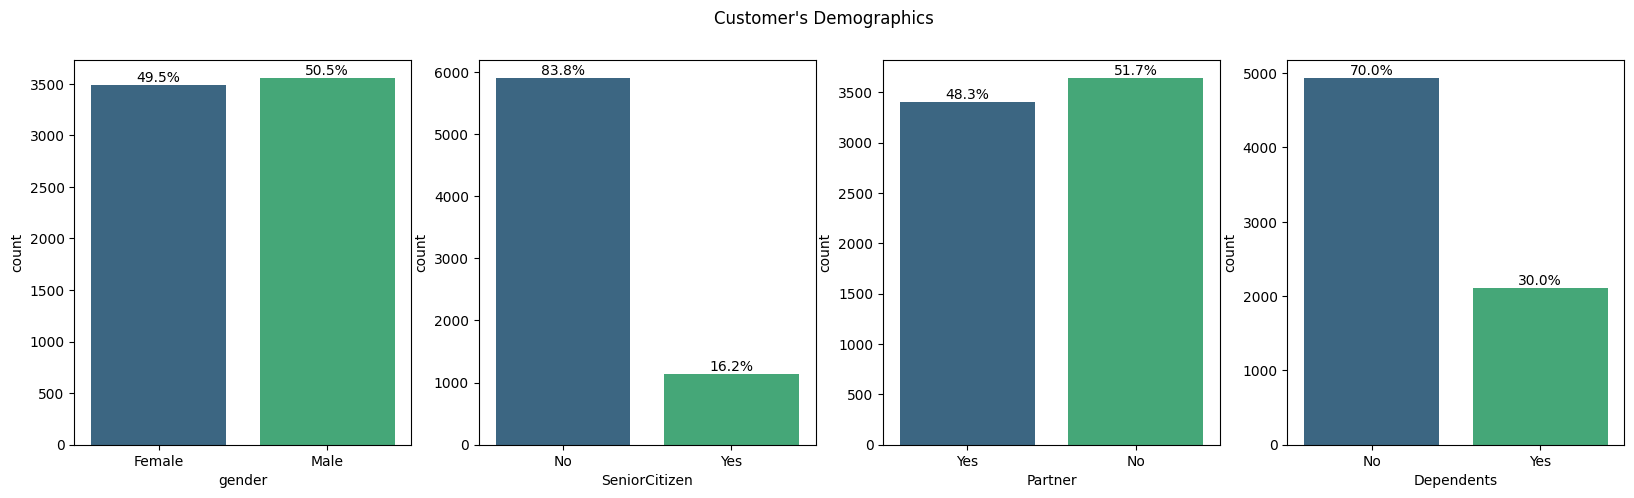

In [10]:
customer_demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig = plt.figure(figsize=(20,5))
fig.tight_layout()
for i in range(len(customer_demographics)):
    ax = plt.subplot(1, 4, i + 1)
    sns.countplot(data=df, x=customer_demographics[i], palette=color, hue=customer_demographics[i], legend=False)

    # Add percentage labels to each bar
    total_height = len(df[customer_demographics[i]])  # total number of data points
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

fig.suptitle("Customer's Demographics");

- The customer demographics show an even gender split of around 50%. This indicates your products/services likely appeal equally to men and women.

- Most customers are not seniors at 83.8% under age 65, meaning the majority potentially have different preferences than the 16.2% senior group.

- Marital status also seems equally divided between those partnered or single. This demonstrates a diverse customer base in terms of household dynamics.

- Additionally, 70% do not have dependents versus 30% with. This implies the majority may have more disposable income and fewer financial obligations.

Potential opportunities:

1. Monitor changes in gender mix over time to identify shifts that could impact satisfaction.
2. Segment by age brackets to tailor offerings to groups like seniors.
3. Study how marital status and dependents influence spending and loyalty.



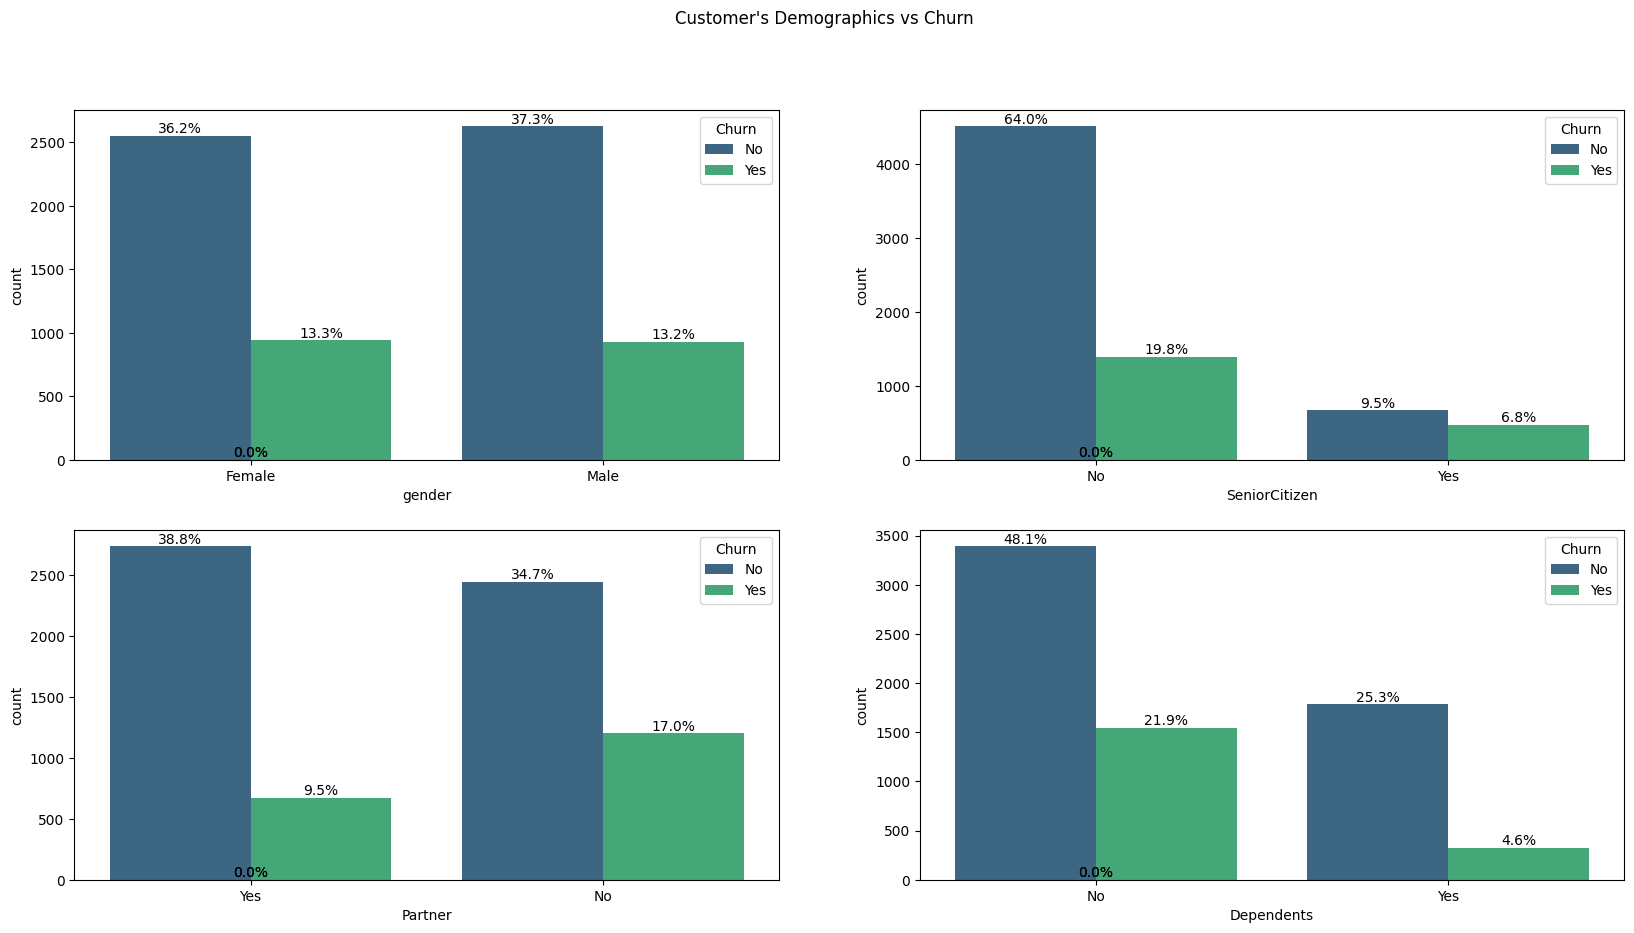

In [9]:
customer_demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig = plt.figure(figsize=(20,10))
fig.tight_layout()
for i in range(len(customer_demographics)):
    ax = plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=customer_demographics[i], palette=color, hue='Churn')

    # Add percentage labels to each bar
    total_height = len(df[customer_demographics[i]])  # total number of data points
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

fig.suptitle("Customer's Demographics vs Churn");

**Demographic Analysis vs. Churn**

Gender does not significantly impact churn, indicating the customer base is gender-neutral/diversed. However, seniors are more likely to churn, suggesting potential dissatisfaction that should be addressed with enhanced offerings. Customers with partners and dependents churn less frequently, showing higher loyalty potentially tied to shared plans or usage.

Specifically:

- Gender churn is evenly split at ~13.3%, confirming gender-neutrality requiring no strategy change and any segmentation is unnecessary.
- ~42% of seniors churn, or 6.8% overall sample. This points to dissatisfaction that can improve via tailored pricing, service, and products.
- Partnered customers have just 9.5% churn versus 17% for single customers, implying partnerships encourage greater loyalty and retention.
- Similarly, customers with dependents are stickier than ones without (21.9% churn), potentially due to shared plans or usage heightening perceived value.

In summary, gender shows parity while seniors, partnerships, and dependents correlate to churn, presenting opportunities to boost loyalty among those groups.



### Customer Services 

`Tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies`

These features cover services customers have subscribed to. Analyzing correlations between specific services and churn provides opportunities to develop better targeted, high-value plans.

#### Tenure

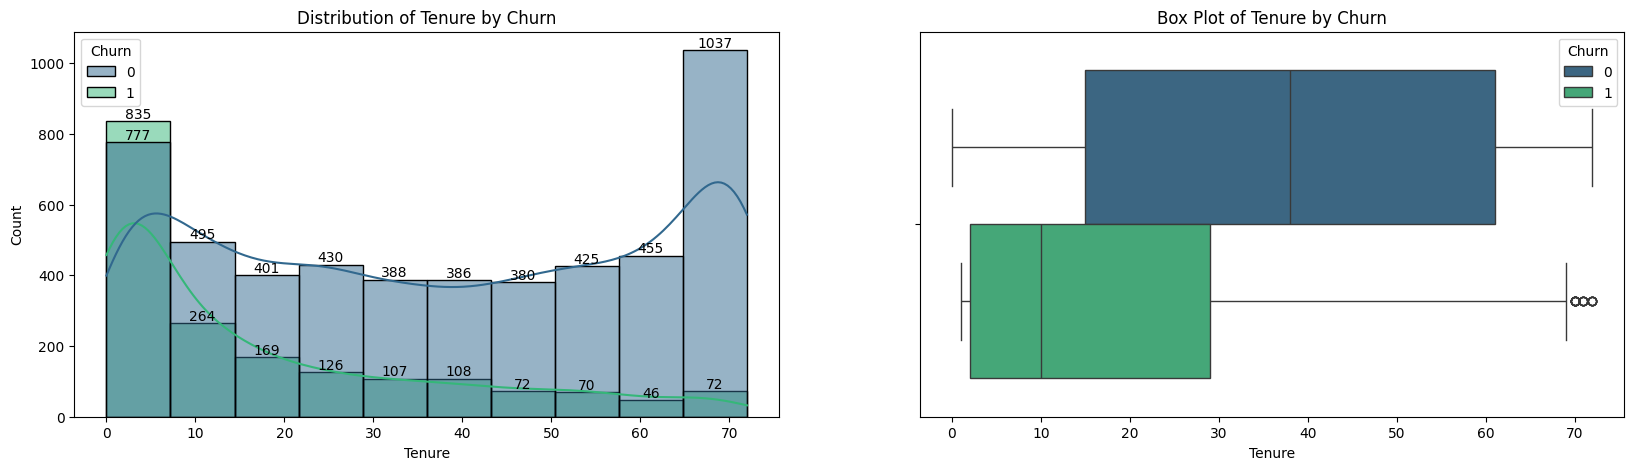

In [55]:
plt.figure(figsize=(20,5))

# Hist plot
ax = plt.subplot(1, 2, 1)
histplot = sns.histplot(data=df, x='tenure', kde=True, bins=10, hue='Churn', palette=color)

# Add labels
plt.xlabel('Tenure')
plt.ylabel('Count')

# Add values above the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom')

# You can also add a title if needed
plt.title('Distribution of Tenure by Churn')

# Box plot
ax = plt.subplot(1, 2, 2)
boxplot = sns.boxplot(data=df, x='tenure', hue='Churn', palette=color)

# Add labels
plt.xlabel('Tenure')

# You can also add a title if needed
plt.title('Box Plot of Tenure by Churn')

# Show the plot
plt.show()


A clear negative correlation exists between customer tenure and churn rate. Newer customers are more likely to churn, while long-term customers are less likely. Reasons may include:

- New customers evaluate and reassess needs within the first year and may switch providers if unhappy.
- Long-time customers tend to be more satisfied and less willing to go through the effort of changing services.

The bar chart shows churn rate declines as tenure increases, with a sharp peak for 0-10 months. Churn then steadily drops, ending with the lowest rate for 60+ months. The box plot confirms this - 75% of churn occurs within 3 years, with the median churn happening by 10 months.

In summary, shorter-tenure customers, especially in the first year, have a higher propensity to churn, while longer-standing customers tend to be sticky. Both charts depict the significant downward trend in churn rate as customer tenure increases over time.

#### Phone Service

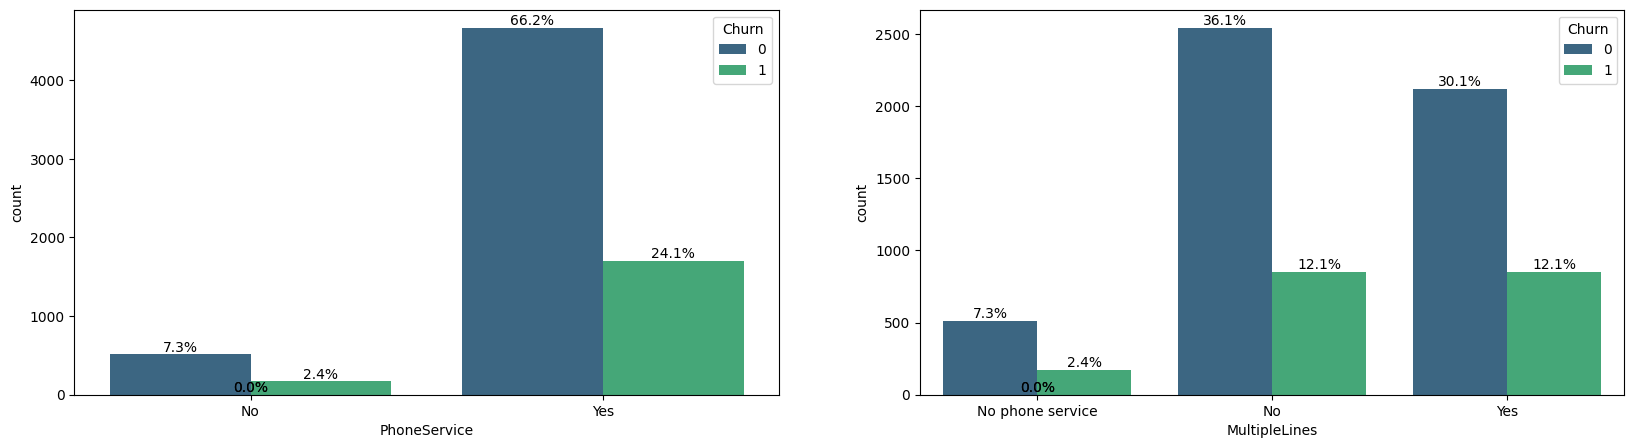

In [34]:
customer_phoneService = ['PhoneService', 'MultipleLines']
fig = plt.figure(figsize=(20,5))
fig.tight_layout()
for i in range(len(customer_phoneService)):
    ax = plt.subplot(1, 2, i + 1)
    sns.countplot(data=df, x=customer_phoneService[i], palette=color, hue='Churn')
    
    # Add percentage labels to each bar
    total_height = len(df[customer_phoneService[i]])  # total number of data points
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom');

- The Phone Service chart shows customers with phone service are more likely to stay at 66.2% retention versus 7.3% for those without. The churn rate is 24.1% with phone service and 2.4% without.

- The Multiple Lines chart compares retention between customers with multiple lines versus no multiple lines. Those with no multiple lines have higher retention at 36.1% non-churn rate versus 30.1% for multiple lines, although both have a 12.1% churn rate. Figures for customers without phone service are shown as percentages of the total customer base.

In summary, phone service customers have significantly stickier retention. Among those with service, multi-line customers retain at a slightly higher rate than single-line. Customers without any phone service have the least retention and lowest churn. The charts display percentages representing relative fractions of all customers.

#### Internet Service

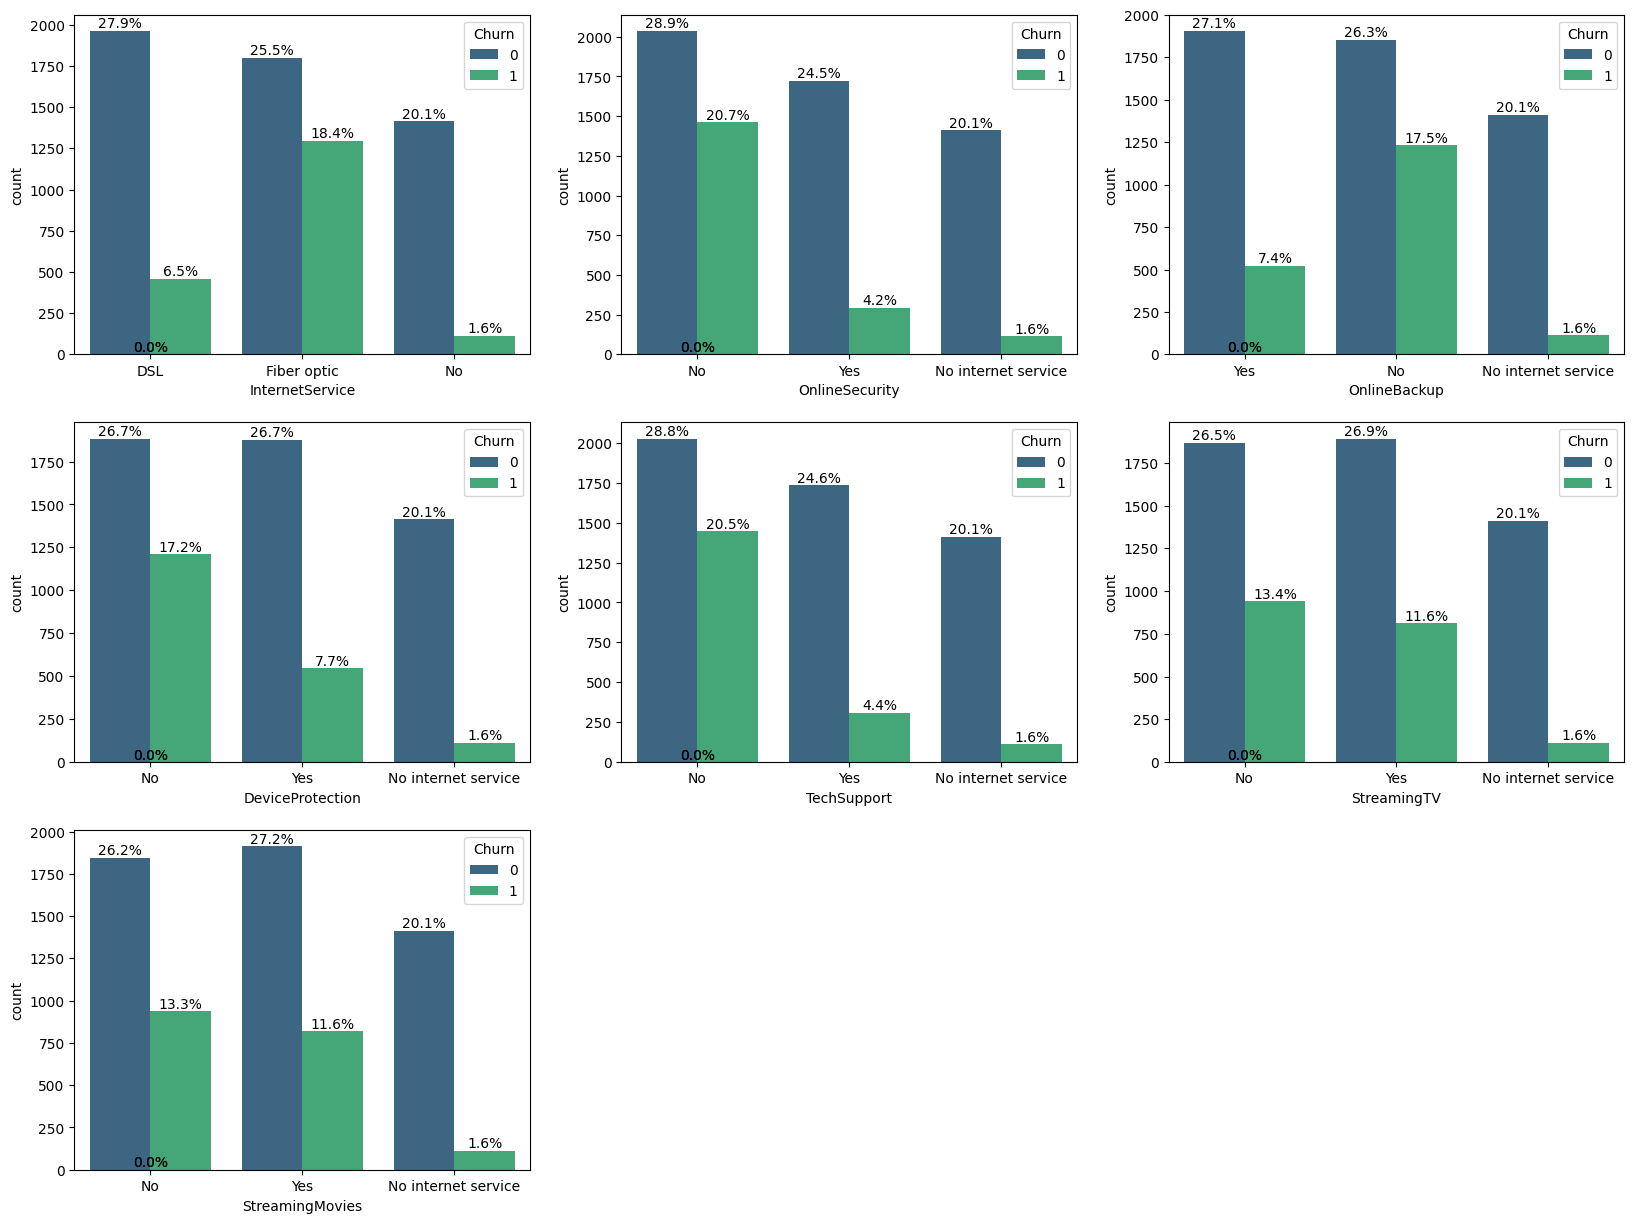

In [35]:
customer_services = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
fig = plt.figure(figsize=(20,15))
fig.tight_layout()
for i in range(len(customer_services)):
    ax = plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=customer_services[i], palette=color, hue='Churn')
    
    # Add percentage labels to each bar
    total_height = len(df[customer_services[i]])  # total number of data points
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom');

**Internet Service and Upgraded Features Churn Rate Analysis**

The Internet Service chart displays...DSL customers have the highest retention rate at 27.9% and 6.5% churn rate, compared to Fiber Optic at 25.5% retention and 18.4% churn. Customers without internet have 20.1% retention and 1.6% churn.

Figures for customers without internet are shown as percentages of the total customer base.

Key findings on churn rates for upgraded service features:

- Online Security - Large discrepancy in churn between those with security at 4.2% and without at 20.7%, showing high value of this feature.
- Online Backup - Similarly, 7.4% churn for those with backup versus 17.5% without indicates strong retention benefits.
- Device Protection - Significant gap as well, with 7.7% churn for protected customers versus 17.2% without protection.
- Tech Support - 4.4% churn with support versus 20.5% for those without demonstrates support's high retention impact.
- Streaming TV & Movies - 11.6% churn for both features, only slightly better than those without at 13.4% TV and 13.3% movies, suggesting less differentiation in value.

In summary, security, backup, and device protection strongly contribute to lower churn rates, while tech support also has high retention impact. Streaming entertainment has milder but still positive retention effects.

### Customer Billing 

`Contract, PaperlessBilling, PaymentMethod, MonthlyCarges, TotalCharges`

These features relate to customer billing details. Billing patterns can uncover links between pricing, contract terms, and customer loyalty.

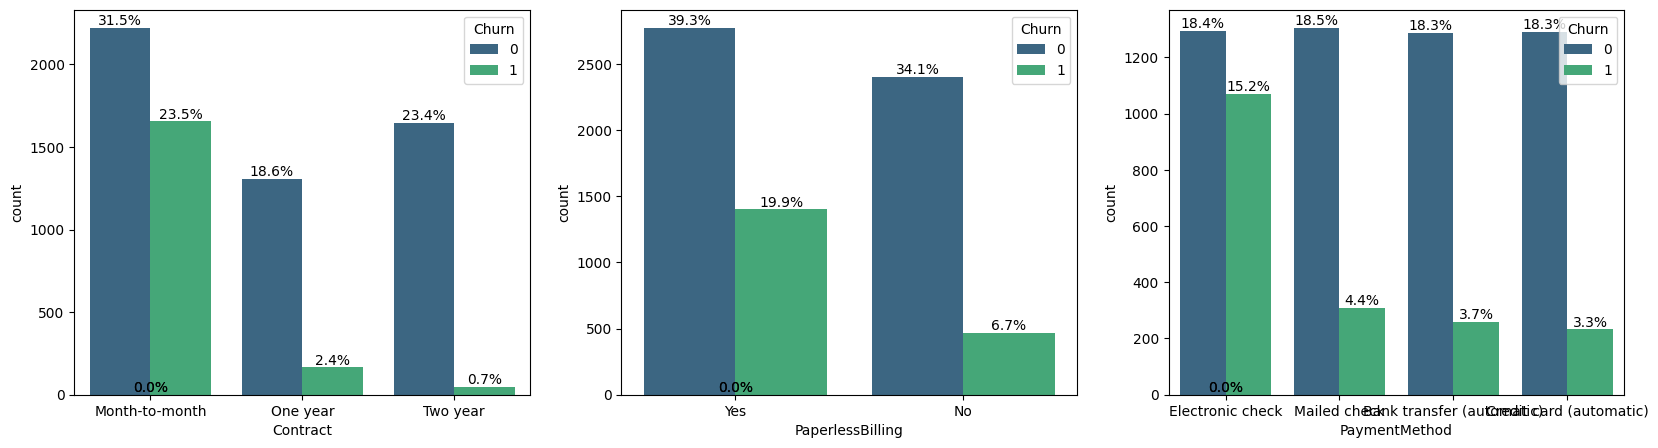

In [54]:
customer_billing_cat = ['Contract', 'PaperlessBilling', 'PaymentMethod']

fig = plt.figure(figsize=(20,5))
fig.tight_layout()
for i in range(len(customer_billing_cat)):
    ax = plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=customer_billing_cat[i], palette=color, hue='Churn')
    
    # Add percentage labels to each bar
    total_height = len(df[customer_billing_cat[i]])  # total number of data points
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom');


- The Contract Type chart shows customer churn rates based on month-to-month, one-year, or two-year contracts. Month-to-month customers have the highest retention rate at 31.5% but also the highest churn rate at 23.5%, making them most likely to leave. One-year customers have lower 18.6% retention and 2.4% churn rates. Two-year customers have the lowest retention at 23.4% and churn at 0.7%.

- The Paperless Billing chart compares churn between customers with and without paperless billing. Customers without paperless billing have a 34.1% retention rate and 6.7% churn rate. With paperless billing, retention is higher at 39.3% but churn also increases to 19.9%.

- The Payment Method chart shows churn rates by electronic check, mailed check, bank transfer, and credit card. All methods have similar ~18.5% retention rates. Electronic check has the highest 15.2% churn rate. Mailed check churn is 4.4%. Bank transfer and credit card have the lowest churn at 3.7% and 3.3% respectively.

In [37]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

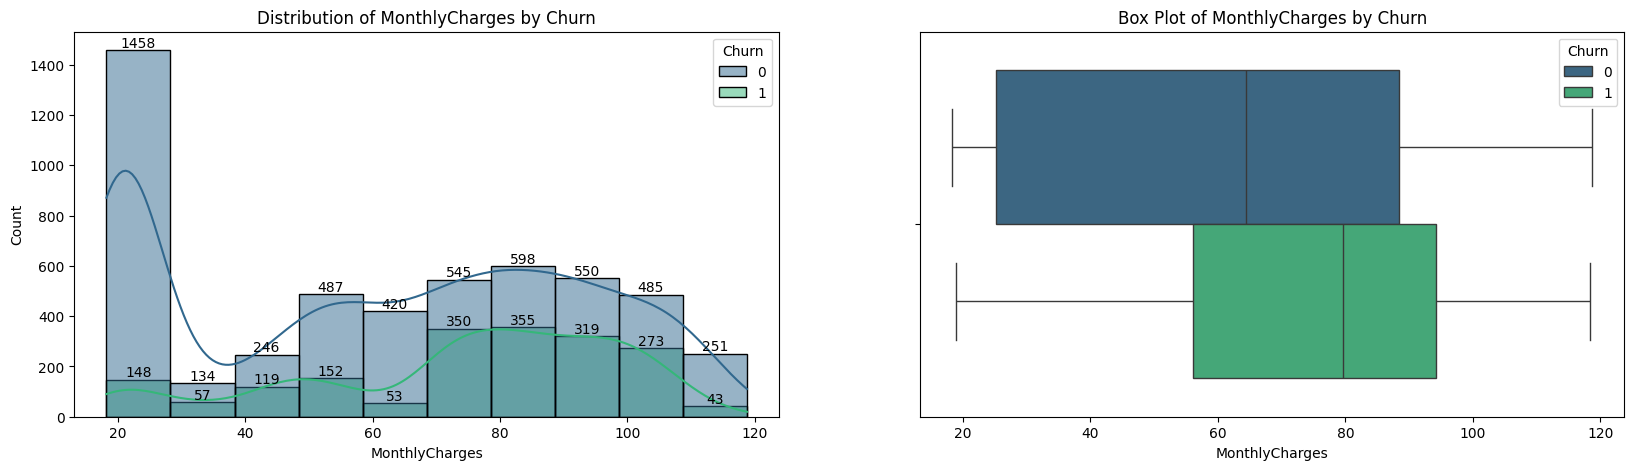

In [52]:
plt.figure(figsize=(20,5))

# Hist plot
ax = plt.subplot(1, 2, 1)
histplot = sns.histplot(data=df, x='MonthlyCharges', kde=True, bins=10, hue='Churn', palette=color)

# Add labels
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')

# Add values above the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom')

# You can also add a title if needed
plt.title('Distribution of MonthlyCharges by Churn')

# Box plot
ax = plt.subplot(1, 2, 2)
boxplot = sns.boxplot(data=df, x='MonthlyCharges', hue='Churn', palette=color)

# Add labels
plt.xlabel('MonthlyCharges')

# You can also add a title if needed
plt.title('Box Plot of MonthlyCharges by Churn')

# Show the plot
plt.show()

The two graphs depict the relationship between monthly charges and customer churn. In the histogram on the left, a significant number of customers with lower monthly charges (20-30 range) are not churning (depicted in blue), while there is a noticeable but smaller peak of customers who do churn in this charge bracket (shown in green). As the monthly charges increase, both churning and non-churning customers decrease, with non-churning always being higher.

- The highest churn occurs at the higher charge bins, indicating price sensitivity.
- Non-churn is consistently higher across all charge, suggesting overall customer satisfaction.

The box plot on the right further illustrates this trend. Customers who do not churn (blue) have a median monthly charge around 60, while those who do churn (green) have a higher median around 80.

- The interquartile range for churning customers is narrower and skewed towards higher monthly charges.
- Non-churning customers exhibit a broader range of monthly charges.

In summary:

- Customers with higher monthly charges are more likely to churn.
- A broad range of monthly charges exists among non-churning customers, indicating diverse service utilization and satisfaction levels.


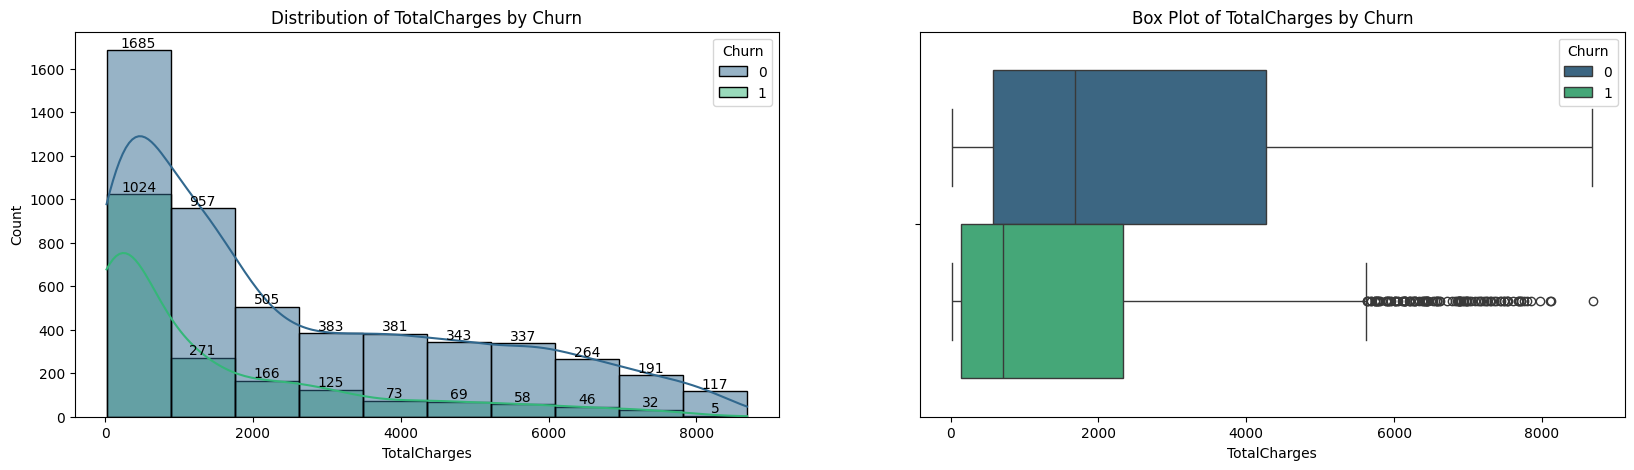

In [53]:
plt.figure(figsize=(20,5))

# Hist plot
ax = plt.subplot(1, 2, 1)
histplot = sns.histplot(data=df, x='TotalCharges', kde=True, bins=10, hue='Churn', palette=color)

# Add labels
plt.xlabel('TotalCharges')
plt.ylabel('Count')

# Add values above the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom')

# You can also add a title if needed
plt.title('Distribution of TotalCharges by Churn')

# Box plot
ax = plt.subplot(1, 2, 2)
boxplot = sns.boxplot(data=df, x='TotalCharges', hue='Churn', palette=color)

# Add labels
plt.xlabel('TotalCharges')

# You can also add a title if needed
plt.title('Box Plot of TotalCharges by Churn')

# Show the plot
plt.show()

The two graphs depict the relationship between total charges and customer churn. It shows that most data points for both churn values are clustered around the lower total charges values. In the boxplot, it’s evident that customers with higher total charges tend to have a churn value of 0 (indicated by blue), while those with lower total charges have a mix of churn values.

- The histogram suggests that customers who pay less are more likely to churn than those who pay more. 
- The boxplot confirms this trend by showing that the median total charges for customers who churn is lower than the median for those who do not churn. The interquartile range for customers who churn is also narrower and skewed towards lower total charges, and has some outliers at higher total charges, while the interquartile range for customers who do not churn is wider.

In summary, the graphs indicate that total charges are negatively correlated with customer churn. Customers with lower total charges are more prone to churn, while customers with higher total charges are more loyal. This could imply that customers who use more services or have longer contracts are more satisfied and less likely to switch providers.

# Data Trasformation

In [30]:
df.Churn = df.Churn.map({'Yes':1, 'No':0})
df_dummies=pd.get_dummies(df.iloc[:,1:])
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7043 non-null   int64  
 4   gender_Female                            7043 non-null   bool   
 5   gender_Male                              7043 non-null   bool   
 6   SeniorCitizen_No                         7043 non-null   bool   
 7   SeniorCitizen_Yes                        7043 non-null   bool   
 8   Partner_No                               7043 non-null   bool   
 9   Partner_Yes                              7043 non-null   bool   
 10  Dependents_No                            7043 no

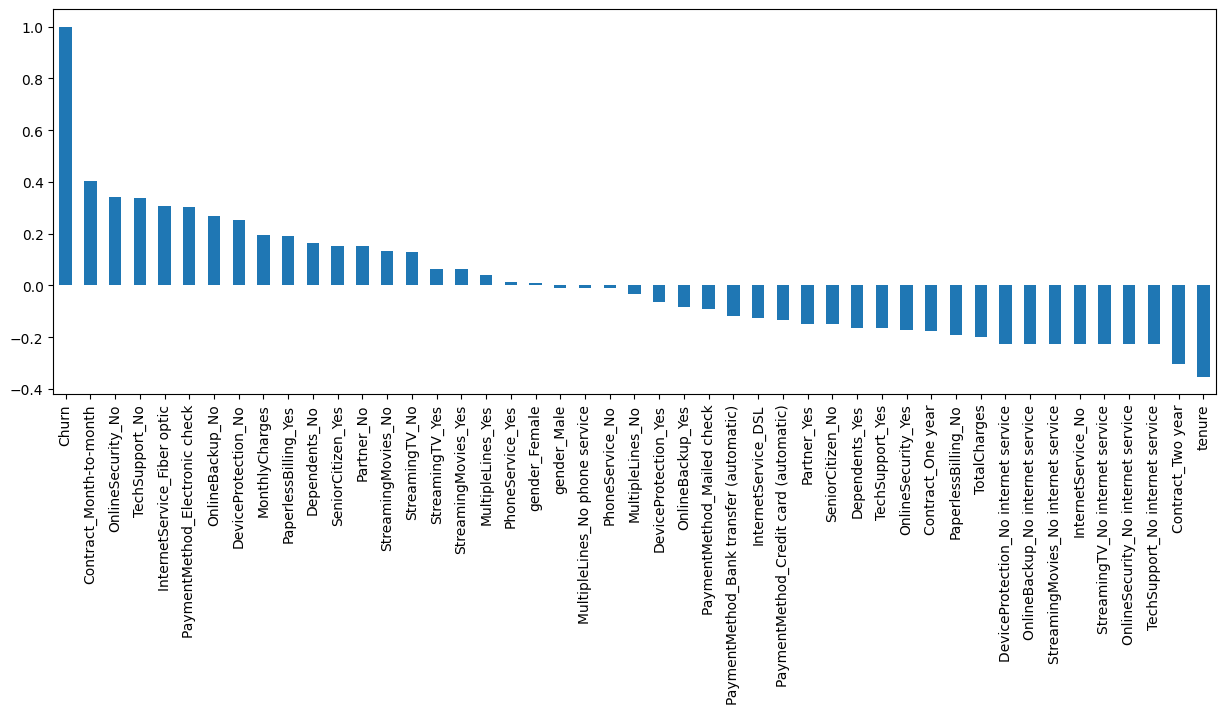

In [31]:
plt.figure(figsize=(15,5))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', color='tab:blue');

In [ ]:
df_dummies.corr()['Churn'].sort_values(ascending=False)

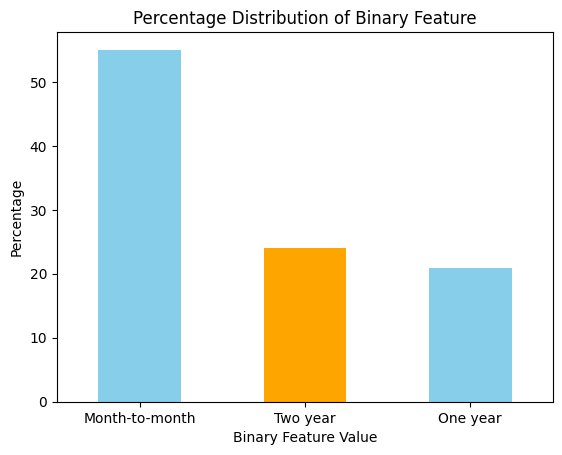

In [32]:
# Calculate the percentage distribution
percentage_distribution = df['Contract'].value_counts(normalize=True) * 100

# Plotting the percentage distribution
percentage_distribution.plot(kind='bar', rot=0, color=['skyblue', 'orange'])
plt.title('Percentage Distribution of Binary Feature')
plt.xlabel('Binary Feature Value')
plt.ylabel('Percentage')
plt.show()

In [58]:
df['tenure'].groupby(df['Churn']).mean()

Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64

In [57]:
df.Churn.value_counts()/len(df.Churn)*100

Churn
0    73.463013
1    26.536987
Name: count, dtype: float64